In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

#### Preparation data

In [2]:
data = datasets.load_digits()
type(data)

sklearn.utils._bunch.Bunch

In [3]:
y = data.target


In [4]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
x = data.images

In [6]:
x[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [7]:
np.shape(x)

(1797, 8, 8)

In [8]:
ds = list(zip(x, y))

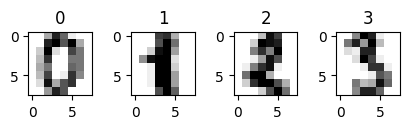

In [9]:
for i, (image, label) in enumerate(ds[:4]):
    plt.subplot(5, 5, i+1)
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title(label)

In [20]:
X = data.images.reshape(len(x), -1)
np.shape(X)

(1797, 64)

In [11]:
ds[0]

(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]),
 0)

In [12]:
from sklearn.svm import SVC

In [13]:
model = SVC()
model = model.fit(X, y)

In [14]:
x_test = data.images[1000]
x_test = x_test.reshape(-1)

In [15]:
np.shape(x_test)

(64,)

In [16]:
model.predict([x_test])

array([1])

#### Evaluation

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [22]:
new_svc = SVC()
new_svc.fit(X_train, y_train)



SVC()

In [23]:
y_pred = new_svc.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        38
           3       1.00      0.98      0.99        41
           4       1.00      0.98      0.99        50
           5       1.00      0.98      0.99        45
           6       1.00      1.00      1.00        43
           7       0.98      1.00      0.99        45
           8       1.00      1.00      1.00        46
           9       0.96      1.00      0.98        50

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [27]:
confusion_matrix(y_test, y_pred)

array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 44,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 46,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 50]], dtype=int64)